***Hey, I'm drivin' here!***

In this notebook we'll examine data from New York City that shows where potholes are, when they were reported, who they were reported by, and when they were fixed. Let's see what we can find!



In [266]:
# Set up packages and data.

library(data.table)
library(lubridate)
library(magicaxis)
library(RColorBrewer)
library(plotrix)
BoroCols = brewer.pal(n = 5, name = "Pastel1")

potholes = fread("Street_Pothole_Work_Orders_-_Closed__Dataset_.csv")

Let's look at the top 10 rows to get a feel for what the data looks like.

In [267]:
potholes[1:10,]

the_geom,OBJECTID,DefNum,InitBy,HouseNum,OFT,OnFaceName,OnPrimName,FrmPrimNam,ToPrimName,SpecLoc,Boro,Source,RptDate,RptClosed,Shape_Leng
<chr>,<int>,<chr>,<chr>,<chr>,<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
"MULTILINESTRING ((-73.94380842208852 40.58499220981168, -73.94379736910109 40.58493267888501), (-73.94386629059676 40.58529836213724, -73.94382221917827 40.58506133175599))",1,DB2004287021,CSC,,318630377030377030,BEDFORD AV,BEDFORD AVENUE,BELT PARKWAY,BELT PARKWAY,SB ON BEDFORD_UNDERNEATH OVERPASS,B,CTZ,10/13/2004,02/14/2013,109.1242
"MULTILINESTRING ((-73.98570910180842 40.64118563355171, -73.98629156768092 40.64062495072484))",2,DB2006085009,CSC,,306380308480308530,13 AV,13 AVENUE,38 STREET,39 STREET,I/F/O B16 BUS STOP,B,CTZ,03/26/2006,10/11/2014,260.4951
"MULTILINESTRING ((-73.93487210852416 40.67959308775291, -73.93435066426116 40.67956340762791, -73.93289696780256 40.67948480958657))",3,DB2007166005,CSC,1688,342730355530375430,FULTON ST,FULTON STREET,LEWIS AVENUE,SCHENECTADY AVENUE,POTHOLE NEAR CURB I/F/O ADDRESS,B,CTZ,06/15/2007,01/14/2011,549.2560
"MULTILINESTRING ((-73.97793940872546 40.689806193405246, -73.97749778005212 40.68753511214314))",4,DB2009352004,CSC,45,380030331530342730,ST FELIX ST,ST FELIX STREET,DEKALB AVENUE,FULTON STREET,"4"""" DEEP",B,CTZ,12/18/2009,01/06/2010,836.4367
"MULTILINESTRING ((-73.9750150681262 40.640761949531154, -73.9739403128278 40.640881308855356, -73.97379738896885 40.64089555049597, -73.97364078299529 40.64091483803061))",5,DB2009362038,CSC,514,313830335030367730,AV C,AVENUE C,EAST 5 STREET,OCEAN PARKWAY,ONE POTHOLE I/F/O DRIVE WAY RIGHT OFF THE CURB,B,CTZ,12/28/2009,01/04/2010,385.4567
"MULTILINESTRING ((-73.92232548215823 40.58629416179612, -73.92356024978042 40.5874006169288))",6,DB2009362066,CSC,,342890356960375990,GAIN CT,GAIN COURT,LOIS AVENUE,SEBA AVENUE,CLOSER TO SEBA AVE,B,CTZ,12/28/2009,01/05/2010,529.2615
"MULTILINESTRING ((-73.96802285162667 40.62445088644635, -73.9670969526524 40.6245530593448))",7,DB2009363041,CSC,808,314080335130335180,AV J,AVENUE J,EAST 8 STREET,EAST 9 STREET,IN FRONT OF ADDRESS NEAR BUS STOP,B,CTZ,12/29/2009,01/04/2010,259.7063
"MULTILINESTRING ((-73.90804743190091 40.69541616050713, -73.90700504867863 40.69647991850006, -73.90652350692359 40.69697614329691))",8,DB2009363045,CSC,1402,347030352130394730,HANCOCK ST,HANCOCK STREET,IRVING AVENUE,WYCKOFF AVENUE,2 POTHOLES IN FRONT OF 1402 HANCOCK ST,B,CTZ,12/29/2009,01/10/2010,708.2337
"MULTILINESTRING ((-73.95291388704382 40.70670031054512, -73.95251503813391 40.70655858630291, -73.95229955465915 40.706490293371964, -73.95191055714336 40.706360078748475))",9,DB2009364034,CSC,,323230349430364630,BDWY,BROADWAY,HEWES STREET,NEW MONTROSE AVENUE,SEVERAL ON STREET,B,CTZ,12/30/2009,01/10/2010,304.5849


Looks like we can get rid of the first column, as these data are only really useful if we want to make maps of this data, which is beyond the scope of this notebook.

In [268]:
geom = potholes[,1] # Save this for later.
potholes = potholes[,-1]
potholes[1:10]

OBJECTID,DefNum,InitBy,HouseNum,OFT,OnFaceName,OnPrimName,FrmPrimNam,ToPrimName,SpecLoc,Boro,Source,RptDate,RptClosed,Shape_Leng
<int>,<chr>,<chr>,<chr>,<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,DB2004287021,CSC,,318630377030377030,BEDFORD AV,BEDFORD AVENUE,BELT PARKWAY,BELT PARKWAY,SB ON BEDFORD_UNDERNEATH OVERPASS,B,CTZ,10/13/2004,02/14/2013,109.1242
2,DB2006085009,CSC,,306380308480308530,13 AV,13 AVENUE,38 STREET,39 STREET,I/F/O B16 BUS STOP,B,CTZ,03/26/2006,10/11/2014,260.4951
3,DB2007166005,CSC,1688,342730355530375430,FULTON ST,FULTON STREET,LEWIS AVENUE,SCHENECTADY AVENUE,POTHOLE NEAR CURB I/F/O ADDRESS,B,CTZ,06/15/2007,01/14/2011,549.2560
4,DB2009352004,CSC,45,380030331530342730,ST FELIX ST,ST FELIX STREET,DEKALB AVENUE,FULTON STREET,"4"""" DEEP",B,CTZ,12/18/2009,01/06/2010,836.4367
5,DB2009362038,CSC,514,313830335030367730,AV C,AVENUE C,EAST 5 STREET,OCEAN PARKWAY,ONE POTHOLE I/F/O DRIVE WAY RIGHT OFF THE CURB,B,CTZ,12/28/2009,01/04/2010,385.4567
6,DB2009362066,CSC,,342890356960375990,GAIN CT,GAIN COURT,LOIS AVENUE,SEBA AVENUE,CLOSER TO SEBA AVE,B,CTZ,12/28/2009,01/05/2010,529.2615
7,DB2009363041,CSC,808,314080335130335180,AV J,AVENUE J,EAST 8 STREET,EAST 9 STREET,IN FRONT OF ADDRESS NEAR BUS STOP,B,CTZ,12/29/2009,01/04/2010,259.7063
8,DB2009363045,CSC,1402,347030352130394730,HANCOCK ST,HANCOCK STREET,IRVING AVENUE,WYCKOFF AVENUE,2 POTHOLES IN FRONT OF 1402 HANCOCK ST,B,CTZ,12/29/2009,01/10/2010,708.2337
9,DB2009364034,CSC,,323230349430364630,BDWY,BROADWAY,HEWES STREET,NEW MONTROSE AVENUE,SEVERAL ON STREET,B,CTZ,12/30/2009,01/10/2010,304.5849


Let's begin by looking at how long it takes for potholes to be fixed. We'll be using the lubridate package to this. Bear in mind that this data set ONLY CONTAINS information on potholes that are closed.

In [245]:
# Start by computing durations.

report = mdy(potholes$RptDate)
close = mdy(potholes$RptClosed)

# The period function in lubridate returns the duration in seconds, so convert this to days for human readability.

timeToClose = as.numeric(as.period(close-report))/(60*60*24)
summary(timeToClose)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -43.00    1.00    1.00    4.97    5.00 6744.00 

What's with the negative durations?

In [246]:
potholes[timeToClose < 0,.(RptDate,RptClosed)]

RptDate,RptClosed
<chr>,<chr>
02/24/2010,02/23/2010
03/02/2010,03/01/2010
03/06/2010,03/05/2010
03/11/2010,03/10/2010
03/23/2010,03/22/2010
04/20/2010,04/19/2010
05/05/2010,05/04/2010
12/10/2010,12/09/2010
02/05/2011,02/04/2011


There isn't any documentation on why these potholes are being reported to have closing dates that come before the reporting dates, so for now let's exclude them.

In [247]:
potholes = cbind(potholes,timeToClose)
potholes = potholes[timeToClose >= 1,]
dim(potholes)
summary(potholes)

[1] 264862     16

    OBJECTID         DefNum             InitBy            HouseNum        
 Min.   :     1   Length:264862      Length:264862      Length:264862     
 1st Qu.: 70425   Class :character   Class :character   Class :character  
 Median :142486   Mode  :character   Mode  :character   Mode  :character  
 Mean   :141688                                                           
 3rd Qu.:210257                                                           
 Max.   :290446                                                           
      OFT                      OnFaceName         OnPrimName       
 Min.   :100786113113197010   Length:264862      Length:264862     
 1st Qu.:305430306830306930   Class :character   Class :character  
 Median :385330353030372930   Mode  :character   Mode  :character  
 Mean   :359697687203136777                                        
 3rd Qu.:445890418540418640                                        
 Max.   :570429510300525908                                        

For the most part, timeToClose isn't too big; but there are clearly some outliers. How many potholes are closed in over a year?

In [248]:
length(which(potholes$timeToClose > 365))

[1] 63

Broadly speaking, where are the potholes?

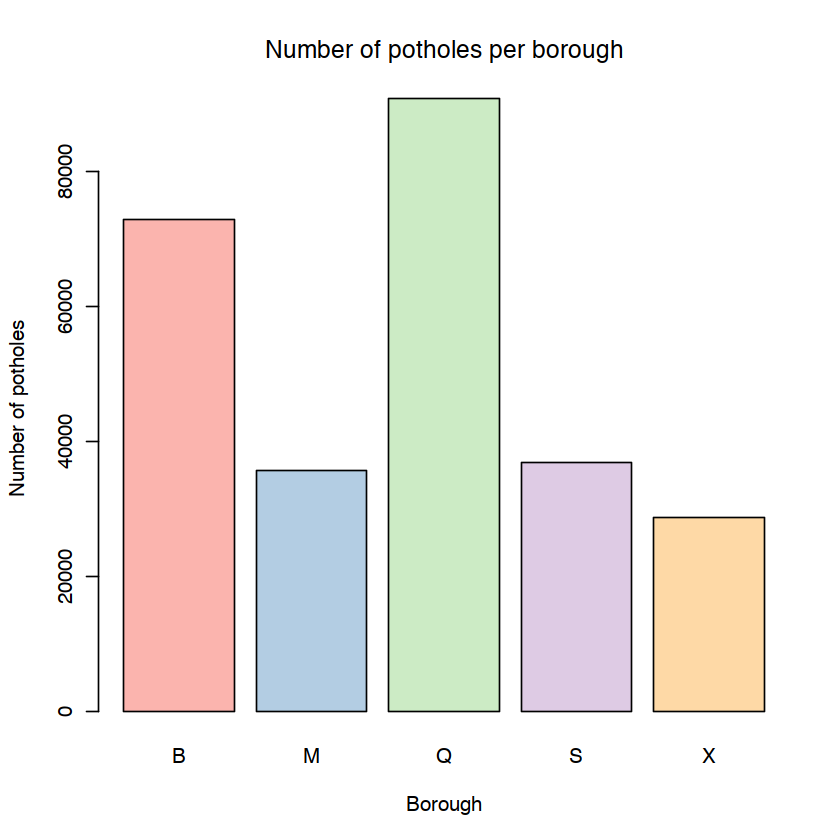

In [249]:
barplot(table(potholes$Boro),col=BoroCols, main = "Number of potholes per borough", xlab = "Borough", ylab="Number of potholes")

Most potholes are in Staten Island and Queens -- not entirely surprising, since these two boroughs have the lengthiest roads.

How about the length of time it takes for potholes to be fixed? Which boroughs perform best? Let's look at potholes closed within a week.

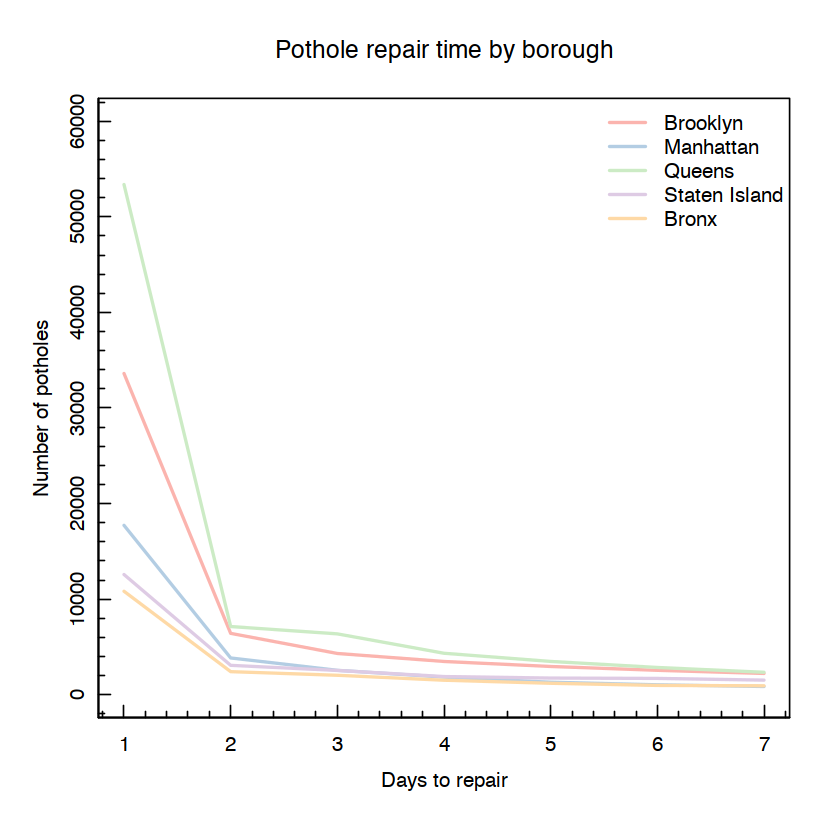

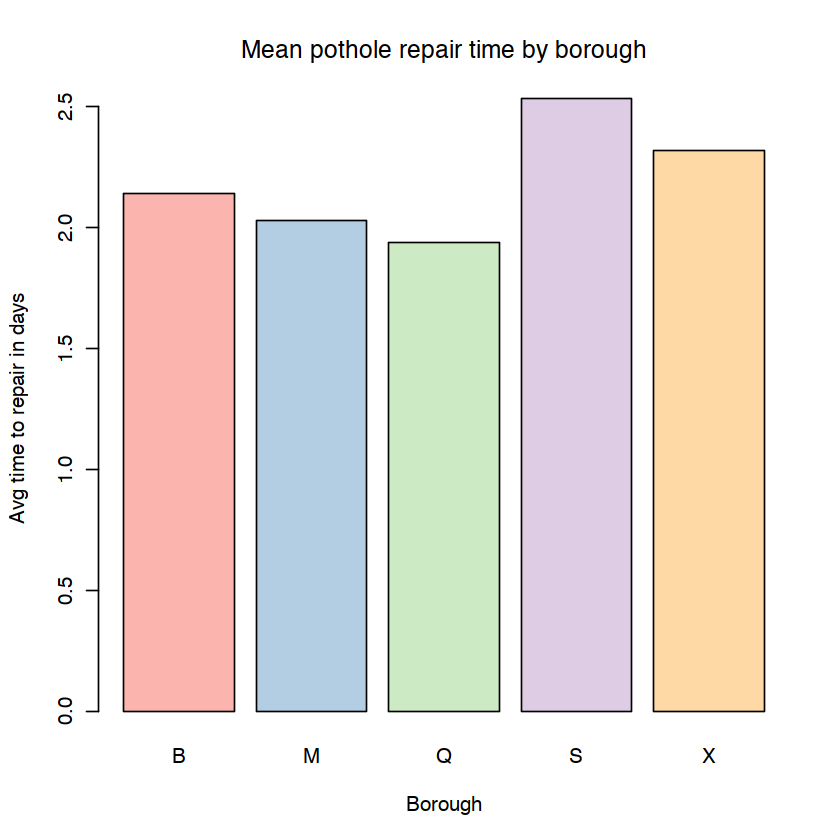

In [250]:
# Set up a results list.

boroList = list(
    B = potholes[timeToClose <= 7 & Boro == "B",timeToClose],
    M = potholes[timeToClose <= 7 & Boro == "M",timeToClose],
    Q = potholes[timeToClose <= 7 & Boro == "Q",timeToClose],
    S = potholes[timeToClose <= 7 & Boro == "S",timeToClose],
    X = potholes[timeToClose <= 7 & Boro == "X",timeToClose]
)

# Plots!

magplot(table(boroList$B),type='l',lwd=2,pch=19,col=BoroCols[1],ylim=c(0,6E4),xlab="Days to repair",ylab="Number of potholes", main = "Pothole repair time by borough")
points(table(boroList$M),type='l',lwd=2,pch=19,col=BoroCols[2])
points(table(boroList$Q),type='l',lwd=2,pch=19,col=BoroCols[3])
points(table(boroList$S),type='l',lwd=2,pch=19,col=BoroCols[4])
points(table(boroList$X),type='l',lwd=2,pch=19,col=BoroCols[5])
legend('topright',legend=c("Brooklyn","Manhattan","Queens","Staten Island","Bronx"),col=BoroCols,bty='n',lwd=2)

barplot(sapply(boroList,mean),col=BoroCols,xlab="Borough",ylab="Avg time to repair in days", main = "Mean pothole repair time by borough")

From the two above plots, we can see that potholes in Queens are fixed the fastest -- by and large, most of the potholes that are fixed within a day. Potholes in Staten Island, on the other hand, take much longer to fix. This is consequently seen in the following plot, which shows the mean time to fix a pothole by each borough.


We can re-examine this data to see if our statement about Queens holds when we look at the range of times it takes to fix a pothole in each borough by using standard boxplots.

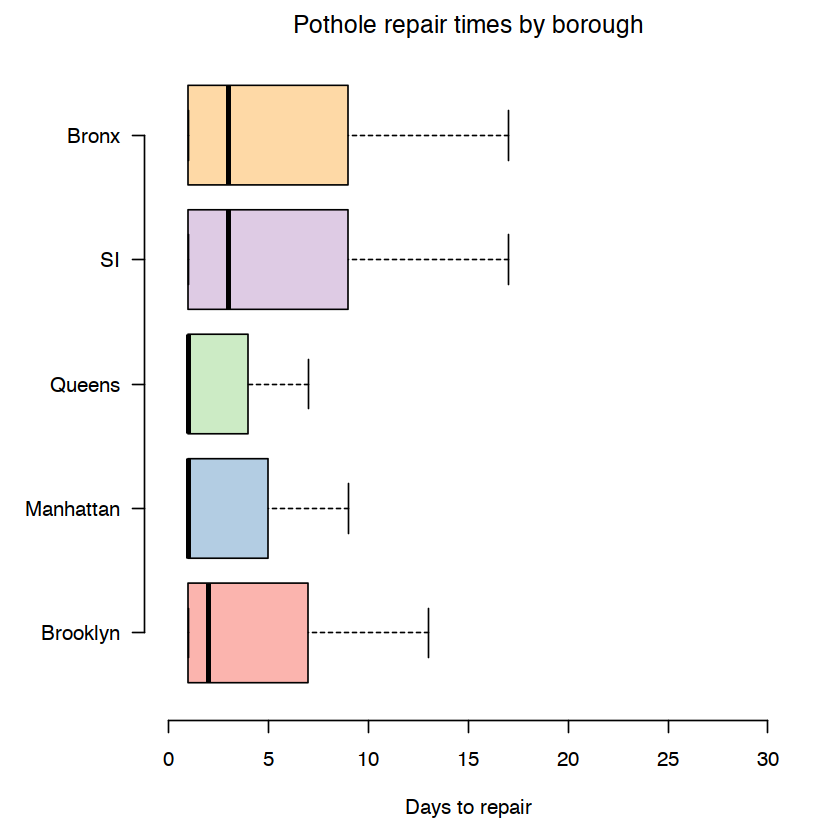

In [251]:
# Set up a results list.

boroList = list(
    Brooklyn = potholes[timeToClose <= 30 & Boro == "B",timeToClose],
    Manhattan = potholes[timeToClose <= 30 & Boro == "M",timeToClose],
    Queens = potholes[timeToClose <= 30 & Boro == "Q",timeToClose],
    SI = potholes[timeToClose <= 30 & Boro == "S",timeToClose],
    Bronx = potholes[timeToClose <= 30 & Boro == "X",timeToClose]
)

# Plot, making some margin adjustments to fit text.

par(mar=c(5,6,2,2))
boxplot(boroList,horizontal=T,las=1, range=1, frame = F,col=BoroCols,outline=F,ylim=c(0,30),xlab="Days to repair", main = "Pothole repair times by borough")

Our results remain consistent! All potholes in Queens are fixed well before the 75th quartile of those in Staten Island are fixed.

The data also tells us who reported the potholes. Does this make a difference in when they are fixed? If so, does this difference change by borough?

There are a large variety of sources, so for the sake of brevity let's look at the biggest ones:
* CTZ - Citizen
* OFF - Official
* OSE - Office of Special Events
* YRD - Yard

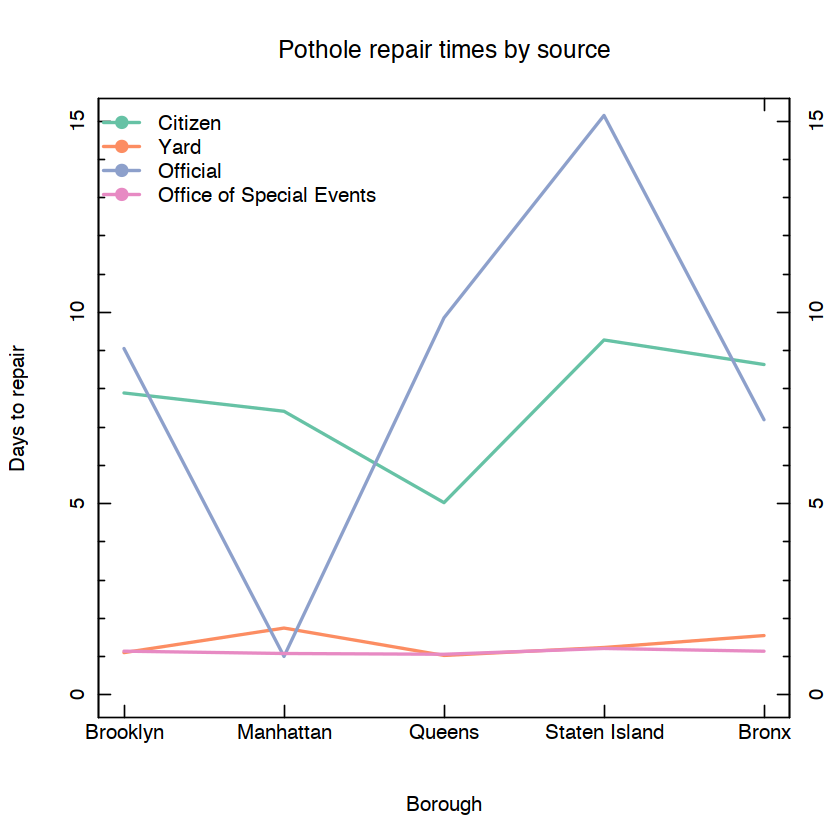

In [252]:
# Set up.

srcList = c("CTZ","YRD","OFF","OSE")
borList = c("B","M","Q","S","X")

sourceDat = matrix(NA,ncol=length(borList),nrow = length(srcList))

# Fill in the matrix in a loop.

for(i in 1:length(srcList)){
    for(j in 1:length(borList)){
        sourceDat[i,j] = mean(potholes[Source==srcList[i] & Boro == borList[j],timeToClose])
    }
}
rownames(sourceDat) = srcList; colnames(sourceDat) = borList

# Plot!

srcCols = brewer.pal(n=4,name="Set2")

plot(sourceDat[1,],type='l',pch=19,ylim=c(0,15),col=srcCols[1],lwd=2, ylab = "Days to repair", xlab = "Borough",axes=F, main = "Pothole repair times by source")
magaxis(side=c(2,4))
magaxis(side=1,majorn=5,minorn=0,labels=F)
magaxis(side=3,majorn=0,minorn=0,labels=F)
mtext(c("Brooklyn","Manhattan","Queens","Staten Island","Bronx"),side=1,at=1:5)
points(sourceDat[2,],type='l',pch=19,col=srcCols[2],lwd=2)
points(sourceDat[3,],type='l',pch=19,col=srcCols[3],lwd=2)
points(sourceDat[4,],type='l',pch=19,col=srcCols[4],lwd=2)

legend('topleft',legend=c("Citizen","Yard","Official","Office of Special Events"),col=srcCols,bty='n',lwd=2,pch=19)

We see a large disparity in the efficiency of pothole repair based on who is reporting the pothole -- and a signficant change by borough as well. Overall we see that potholes reported by the Department of Transportation's Yards and the city's Office of Special Events are repaired fastest. The OSE is in charge of organizing special events throughout the city, so it makes sense that the potholes they report may need to be repaired ASAP prior to an important event.

What is striking, however, is the disparity in how long it takes for potholes to be fixed when reported by officials. Specifically, we see that potholes reported by officials in Manhattan are fixed in a single day, whereas those reported by officials in the other boroughs take a similar time (if not more) to be fixed than those reported by citizens.

Now let's look at when people are reporting potholes. Let's look at this on a per week basis.

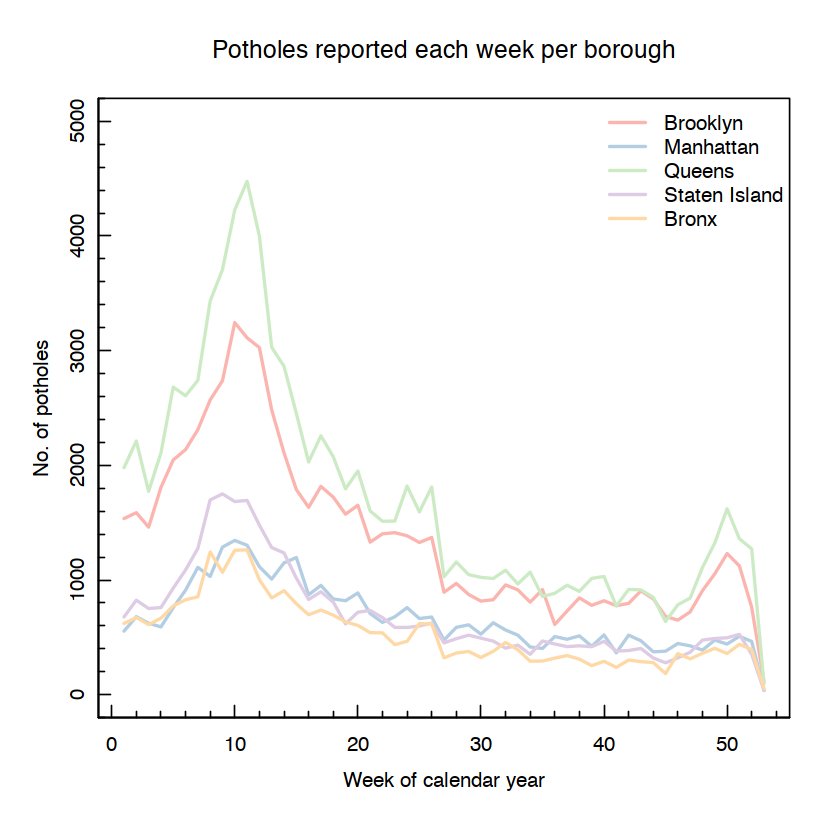

In [253]:
# Get report week using the week() function.

reportWeek = week(mdy(potholes$RptDate))
potholes = cbind(potholes,reportWeek)

# Use table() to get number of potholes per borough per report week.

magplot(table(potholes[Boro=="B",reportWeek]),type='l',lwd=2,col=BoroCols[1],xlab="Week of calendar year", ylab = "No. of potholes", ylim=c(0,5000), main = "Potholes reported each week per borough")
points(table(potholes[Boro=="M",reportWeek]),type='l',lwd=2,col=BoroCols[2])
points(table(potholes[Boro=="Q",reportWeek]),type='l',lwd=2,col=BoroCols[3])
points(table(potholes[Boro=="S",reportWeek]),type='l',lwd=2,col=BoroCols[4])
points(table(potholes[Boro=="X",reportWeek]),type='l',lwd=2,col=BoroCols[5])

legend('topright',legend=c("Brooklyn","Manhattan","Queens","Staten Island","Bronx"),col=BoroCols,bty='n',lwd=2)

Here the results do not vary greatly between boroughs. The biggest trend we see is that people are very keen to report potholes on the 10th week of the year, which generally falls in the beginning of March. Perhaps this is because March is generally the first month in a year where the average minimum temperature in New York City rises above freezing -- thawing ice can lead to the creation of potholes.

Overall, more potholes are reported in the winter months, which is also a sensible conclusion to come to.

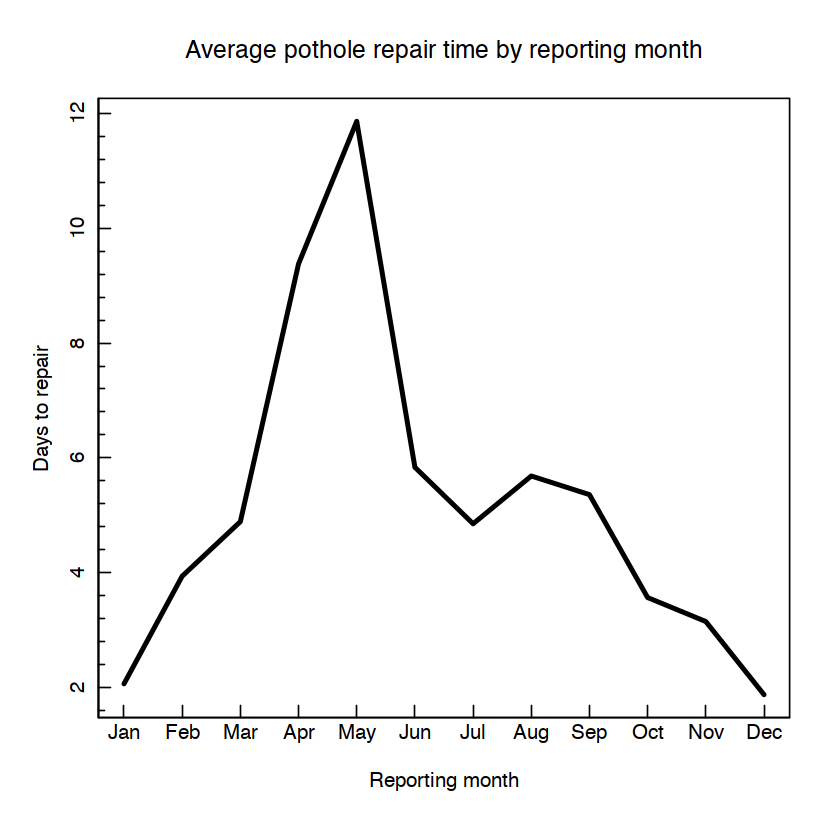

In [254]:
monFixTime <- function(x){
    return(mean(potholes[month(mdy(potholes$RptDate))==x,timeToClose]))
}

fixbyMonth = sapply(X = 1:12, FUN = monFixTime)
magplot(x = 1:12, y = fixbyMonth,labels=c(F,T),type='l',pch=19,lwd=3,ylab="Days to repair", xlab = "Reporting month",axes=F,minorn=c(0,5),majorn=c(12,5), main = "Average pothole repair time by reporting month")
mtext(side=1,text=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"), at = 1:12)

The knock-on effect is evident. As the number of reported potholes increases in March, we see the city's workforce stretch, until there is a backlog that causes potholes reported in April and May to take longer to fix. The city catches up by June and settles into a steady rhythm until the winter, where rapid response to potholes commences anew.

Based on this analysis, the city would benefit most by increasing the pothole repair workforce in March through May, as well as looking into the ways in which different officials in different boroughs report potholes. Finally, the city should consider responding as rapidly to potholes in the other boroughs as it does in Queens.

We can go a little bit deeper: the OFT column in the data is a unique identifier of each block in the city where a pothole is found. It is therefore possible to look at the distribution of blocks that have had multiple potholes. From there we can ask: what is the distribution of pothole reopenings?


    2     3     4     5     6     7     8     9    10    11    12    13    14 
10367  7211  5218  3949  3003  2385  1952  1507  1132   926   674   587   488 
   15    16    17    18    19    20    21    22    23    24    25    26    27 
  431   347   289   223   191   171   127   114   117    83    67    49    56 
   28    29    30    31    32    33    34    35    36    37    38    39    40 
   53    34    31    31    28    20    23    21    15    14    11    12    13 
   41    42    43    44    45    46    47    48    49    50    51    52    53 
    5     4    10     5     1     3     1     3     4     9     4     2     2 
   54    55    58    62    64    66    69    70    72    75    87    90   102 
    4     3     2     1     2     2     1     1     2     1     1     1     1 
  114   154 
    1     1 

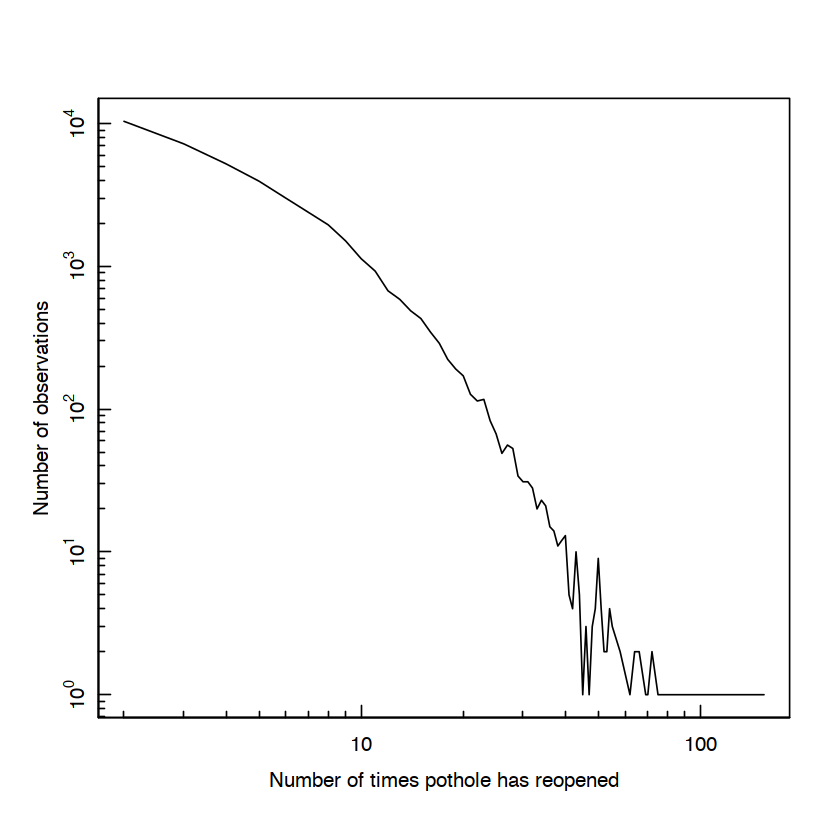

In [257]:
library(bit64)

# Work with the OFT column in the data. This is a 64-bit int

temp = table(potholes$OFT)
potholeReoc = cbind(as.integer64(names(temp)),as.numeric(temp))
potholeReoc = potholeReoc[order(potholeReoc[,2],decreasing=T),]
potholeReoc[,2] = as.integer(potholeReoc[,2])

ocurrence = table(potholeReoc[which(potholeReoc[,2]>1),2])
ocurrence

magplot(as.numeric(names(ocurrence)),as.numeric(ocurrence),log='xy',type='l',xlab="Number of times pothole has reopened",ylab="Number of observations")

#potholeIDs = as.integer64(unlist(potholes$OFT))

#potholes[which(potholeIDs == potholeReoc[1,1]),]


As a bonus, let's take a look at how susceptible our results are to the differing numbers of potholes in each borough. Let's do this for the number of days it takes to fix a pothole by borough. Rather than plotting histograms or looking at barplots, we'll convolve the data by a kernel of fixed bandwidth and plot probability density estimates along the y-axis. If these rank orders are the same as before, things are looking good!

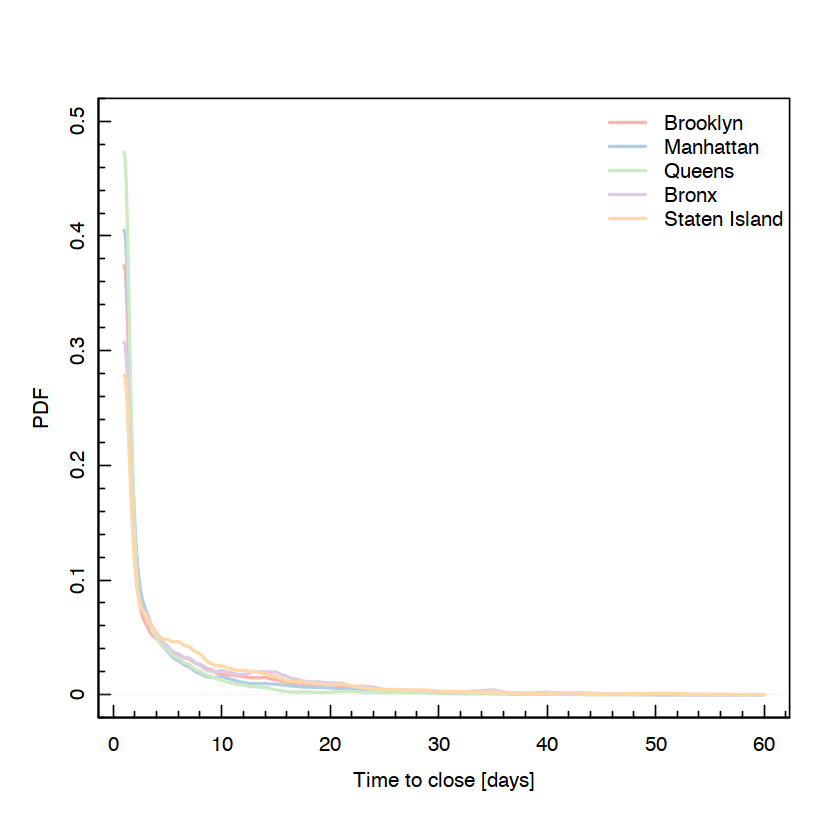

In [255]:
# Plot the outputs of the density() function computed with a fixed bandwidth.

magplot(density(potholes[Boro == "B",timeToClose],bw=0.5,from=1,to=60),col=BoroCols[1],lwd=2,xlab="Time to close [days]",ylab="PDF",ylim=c(0,0.5))
points(density(potholes[Boro == "M",timeToClose],bw=0.5,from=1,to=60),col=BoroCols[2],lwd=2,type='l')
points(density(potholes[Boro == "Q",timeToClose],bw=0.5,from=1,to=60),col=BoroCols[3],lwd=2,type='l')
points(density(potholes[Boro == "X",timeToClose],bw=0.5,from=1,to=60),col=BoroCols[4],lwd=2,type='l')
points(density(potholes[Boro == "S",timeToClose],bw=0.5,from=1,to=60),col=BoroCols[5],lwd=2,type='l')
legend('topright',legend=c("Brooklyn","Manhattan","Queens","Bronx","Staten Island"),col=BoroCols,bty='n',lwd=2)

Let's zoom in a little more.

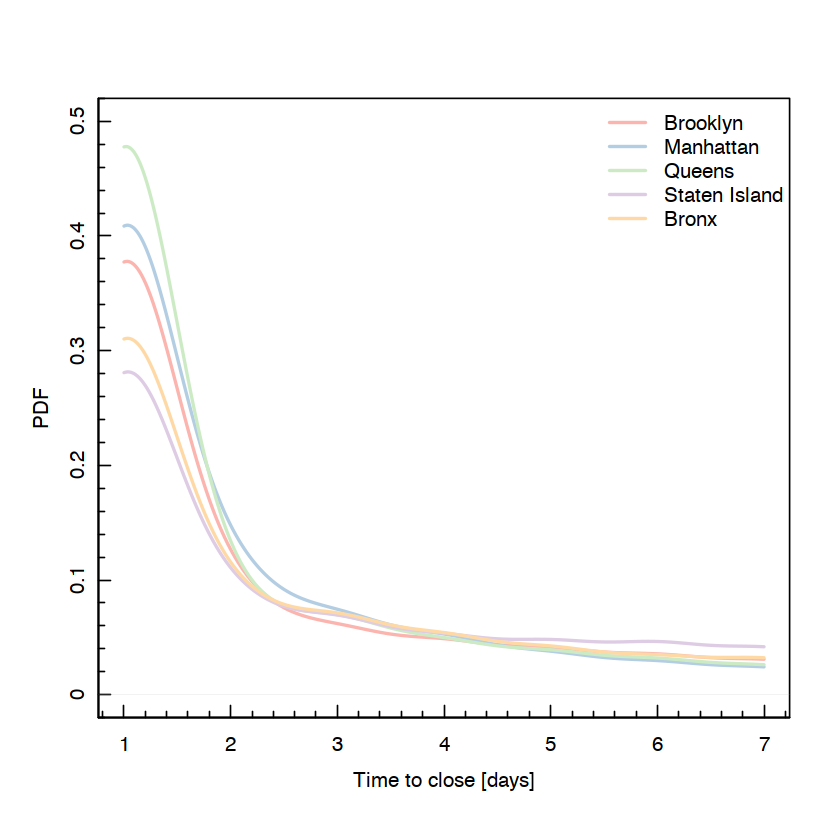

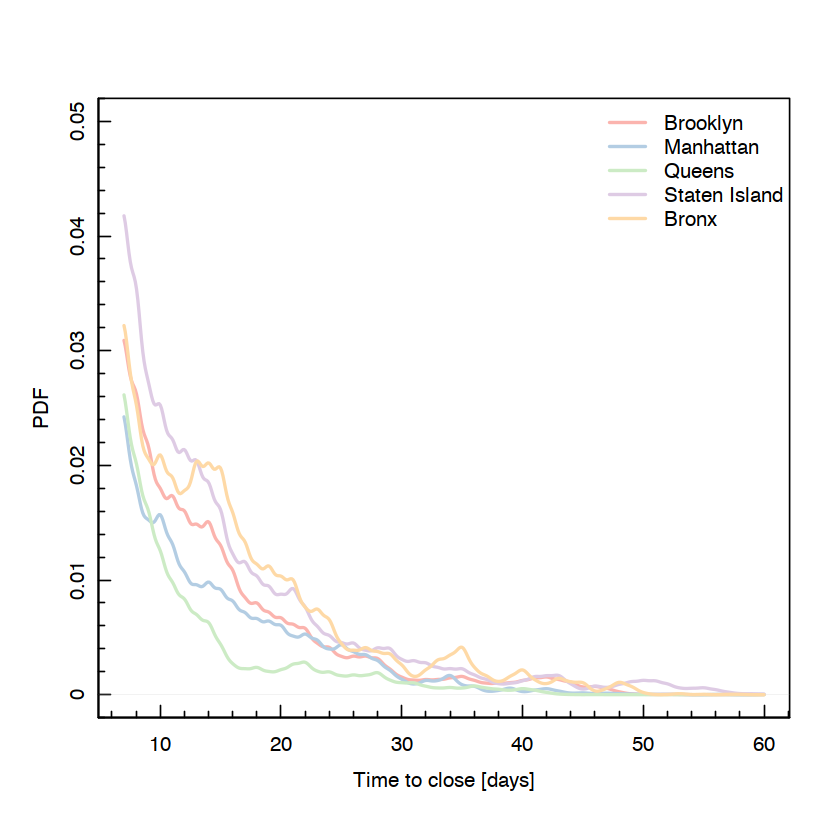

In [256]:
magplot(density(potholes[Boro == "B",timeToClose],bw=0.5,from=1,to=7),col=BoroCols[1],lwd=2,xlab="Time to close [days]",ylab="PDF",ylim=c(0,0.5))
points(density(potholes[Boro == "M",timeToClose],bw=0.5,from=1,to=7),col=BoroCols[2],lwd=2,type='l')
points(density(potholes[Boro == "Q",timeToClose],bw=0.5,from=1,to=7),col=BoroCols[3],lwd=2,type='l')
points(density(potholes[Boro == "S",timeToClose],bw=0.5,from=1,to=7),col=BoroCols[4],lwd=2,type='l')
points(density(potholes[Boro == "X",timeToClose],bw=0.5,from=1,to=7),col=BoroCols[5],lwd=2,type='l')
legend('topright',legend=c("Brooklyn","Manhattan","Queens","Staten Island","Bronx"),col=BoroCols,bty='n',lwd=2)

magplot(density(potholes[Boro == "B",timeToClose],bw=0.5,from=7,to=60),col=BoroCols[1],lwd=2,xlab="Time to close [days]",ylab="PDF",ylim=c(0,0.05))
points(density(potholes[Boro == "M",timeToClose],bw=0.5,from=7,to=60),col=BoroCols[2],lwd=2,type='l')
points(density(potholes[Boro == "Q",timeToClose],bw=0.5,from=7,to=60),col=BoroCols[3],lwd=2,type='l')
points(density(potholes[Boro == "S",timeToClose],bw=0.5,from=7,to=60),col=BoroCols[4],lwd=2,type='l')
points(density(potholes[Boro == "X",timeToClose],bw=0.5,from=7,to=60),col=BoroCols[5],lwd=2,type='l')
legend('topright',legend=c("Brooklyn","Manhattan","Queens","Staten Island","Bronx"),col=BoroCols,bty='n',lwd=2)

We do see some subtle differences: while Queens and Staten Island retain their ranking as the boroughs in which holes are fixed quickest and slowest, we do see a more rapid variation in the rankings of boroughs. This suggests that we should take pothole numbers into account when examining some of the boroughs; but that our primary conclusions remain true.